In [11]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATCH_PATH = ('cylinder2_rgb_small')

In [3]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)

Loaded /n/home05/haehn/patches_local//cylinder2_rgb_small/ in 0.0659239292145 seconds.


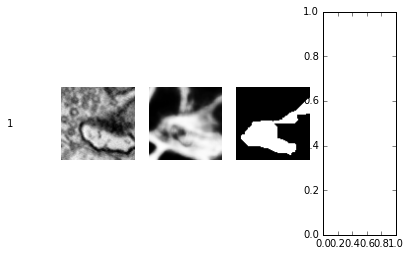

In [4]:
gp.Util.view_rgba(X_train[100], y_train[100])

In [5]:
cnn = nets.RGBNetPlus()

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout. This also includes more layers. And more filters.
    


In [6]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 478498 learnable parameters

## Layer information

  #  name      size
---  --------  ---------
  0  input     3x75x75
  1  conv1     128x73x73
  2  pool1     128x36x36
  3  dropout1  128x36x36
  4  conv2     96x34x34
  5  pool2     96x17x17
  6  dropout2  96x17x17
  7  conv3     96x15x15
  8  pool3     96x7x7
  9  dropout3  96x7x7
 10  conv4     96x5x5
 11  pool4     96x2x2
 12  dropout4  96x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.34724     0.23231    1.49473      0.91779  32.17s
      2     0.22757     0.21035    1.08186      0.92428  32.02s
      3     0.20607     0.19018    1.08355      0.93472  32.22s
      4     0.19355     0.18425    1.05046      0.93310  32.21s
      5     0.18282     0.17397    1.05089      0.93751  32.23s
      6     0.17313     0.16317    1.06108      0.94030  32.32s
      7     0

In [7]:
test_accuracy = cnn.score(X_test, y_test)

In [8]:
test_accuracy

0.9195725534308211

<module 'matplotlib.pyplot' from '/n/home05/haehn/nolearncox/lib/python2.7/site-packages/matplotlib-1.5.2-py2.7-linux-x86_64.egg/matplotlib/pyplot.pyc'>

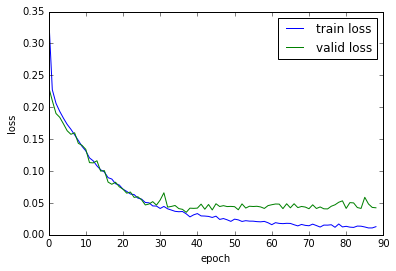

In [9]:
plot_loss(cnn)

In [12]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/RGBPlusPlus.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)